In [ ]:
from torch import nn
import numpy as np
import torch
import matplotlib.pyplot as plt

In [11]:
# Creating a function f(X) with a slope of -5 and bias of -4
slope = -5
bias = -4
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = slope * X + bias
 
# Adding Gaussian noise to the function f(X) and saving it in Y
noise = 1.4 * torch.randn(X.size())
Y = func + noise

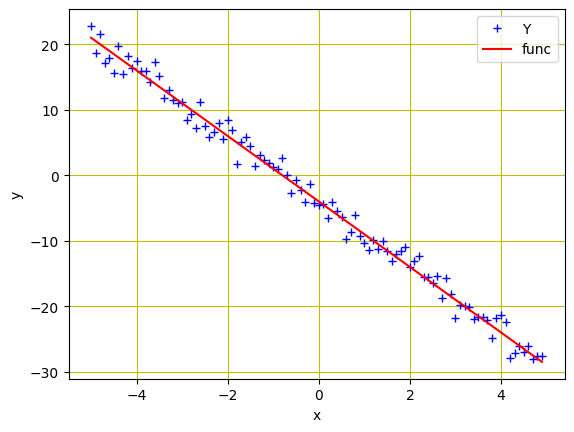

In [12]:

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [5]:
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super().__init__() 
            ## PUT YOUR MODEL HERE
            
        def forward(self, x):
            ## DO THE FEED-FORWARD OF YOU MODEL
            output = None
            return output

In [6]:

# Instanciate the model
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))

model_0 = None # REPLACE 'None' BY YOUR MODEL
# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters()) 

[Parameter containing:
 tensor([[0.0930]], requires_grad=True),
 Parameter containing:
 tensor([-0.9159], requires_grad=True)]

In [13]:
# Create a loss function
loss_fn = None # REPLACE 'None' BY A LOSS FUNCTION
# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate

In [14]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [17]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

### Training
for epoch in range(epochs):
    # Put model in training mode (this is the default state of a model)
    model_0.train()

    ### Feed-Forward propagation
    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    ### Backpropagation
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Progress the optimizer
    optimizer.step()

    ### Testing
    # Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type
      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 85.4462890625 | MAE Test Loss: 305.6117248535156 
Epoch: 10 | MAE Train Loss: 14.140005111694336 | MAE Test Loss: 72.03426361083984 
Epoch: 20 | MAE Train Loss: 8.006567001342773 | MAE Test Loss: 33.681148529052734 
Epoch: 30 | MAE Train Loss: 6.211292266845703 | MAE Test Loss: 22.166677474975586 
Epoch: 40 | MAE Train Loss: 5.066614627838135 | MAE Test Loss: 16.513830184936523 
Epoch: 50 | MAE Train Loss: 4.247881889343262 | MAE Test Loss: 12.886886596679688 
Epoch: 60 | MAE Train Loss: 3.656426191329956 | MAE Test Loss: 10.307528495788574 
Epoch: 70 | MAE Train Loss: 3.228811740875244 | MAE Test Loss: 8.40813159942627 
Epoch: 80 | MAE Train Loss: 2.9196338653564453 | MAE Test Loss: 6.990763187408447 
Epoch: 90 | MAE Train Loss: 2.69608736038208 | MAE Test Loss: 5.92542028427124 


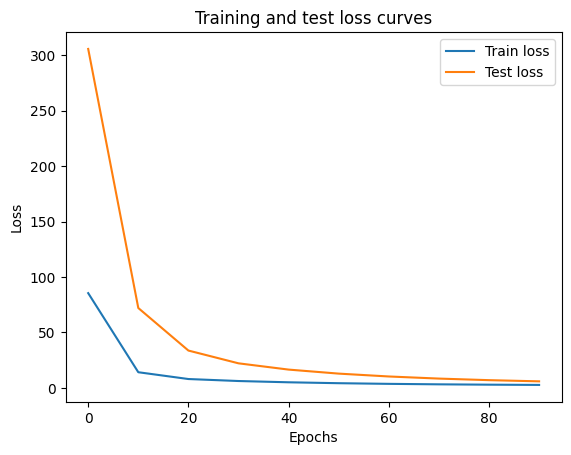

In [18]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [19]:
# Find our model's learned parameters

## PLEASE PRINT THE PARAMATERS LEARNED VS THE ACTUAL PARAMETERS

The model learned the following values for weights and bias: OrderedDict([('linear_sigmoid_stack.0.weight', tensor([[-4.7898]])), ('linear_sigmoid_stack.0.bias', tensor([-3.1203]))])

And the original values for weights and bias are:
weights: -5, bias: -4


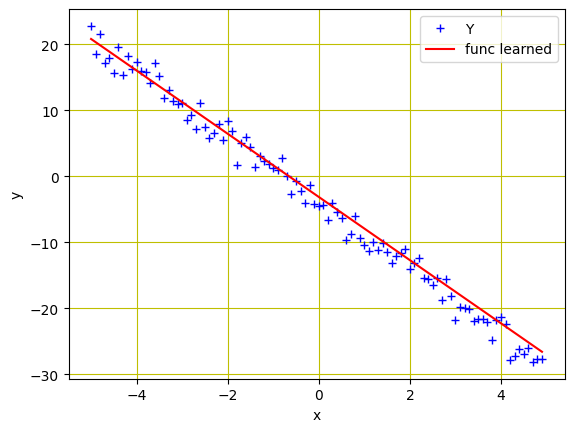

In [22]:
# PLOT THE POINTS AND THE FUNCTION LEARNED
y_pred = model_0(X)